In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/dataset_reduced.csv')
data_encoded = pd.get_dummies(data)


data_encoded['target_class'] = pd.qcut(data_encoded['Specific capacity'], q=10, labels=False)
X = data_encoded.drop(['Specific capacity', 'target_class'], axis=1)
y = data_encoded['Specific capacity']
stratify_column = data_encoded['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train, X_test, y_train, y_test

(         O     N  Specific surface area  Pore volume       Dap  ID/IG  \
 484  15.55  2.61                3139.20        1.740  2.217125  1.020   
 145   7.71  0.00                 804.00        0.315  1.567164  0.970   
 491  15.55  2.61                3139.20        1.740  2.217125  1.020   
 463   8.35  2.41                2511.00        2.170  3.456790  2.070   
 216   4.89  1.74                1666.80        2.420  5.807535  0.880   
 ..     ...   ...                    ...          ...       ...    ...   
 460   8.35  2.41                2511.00        2.170  3.456790  2.070   
 224   6.42  2.75                1301.60        3.040  9.342348  0.920   
 375   3.37  0.00                3252.60        3.428  4.215704  1.020   
 340   6.75  2.16                2363.18        1.330  2.251204  0.790   
 124   9.64  3.44                1624.00        0.918  2.261084  0.999   
 
      Current density    micro%  
 484              5.0  0.557471  
 145              4.0  0.621891  
 491    

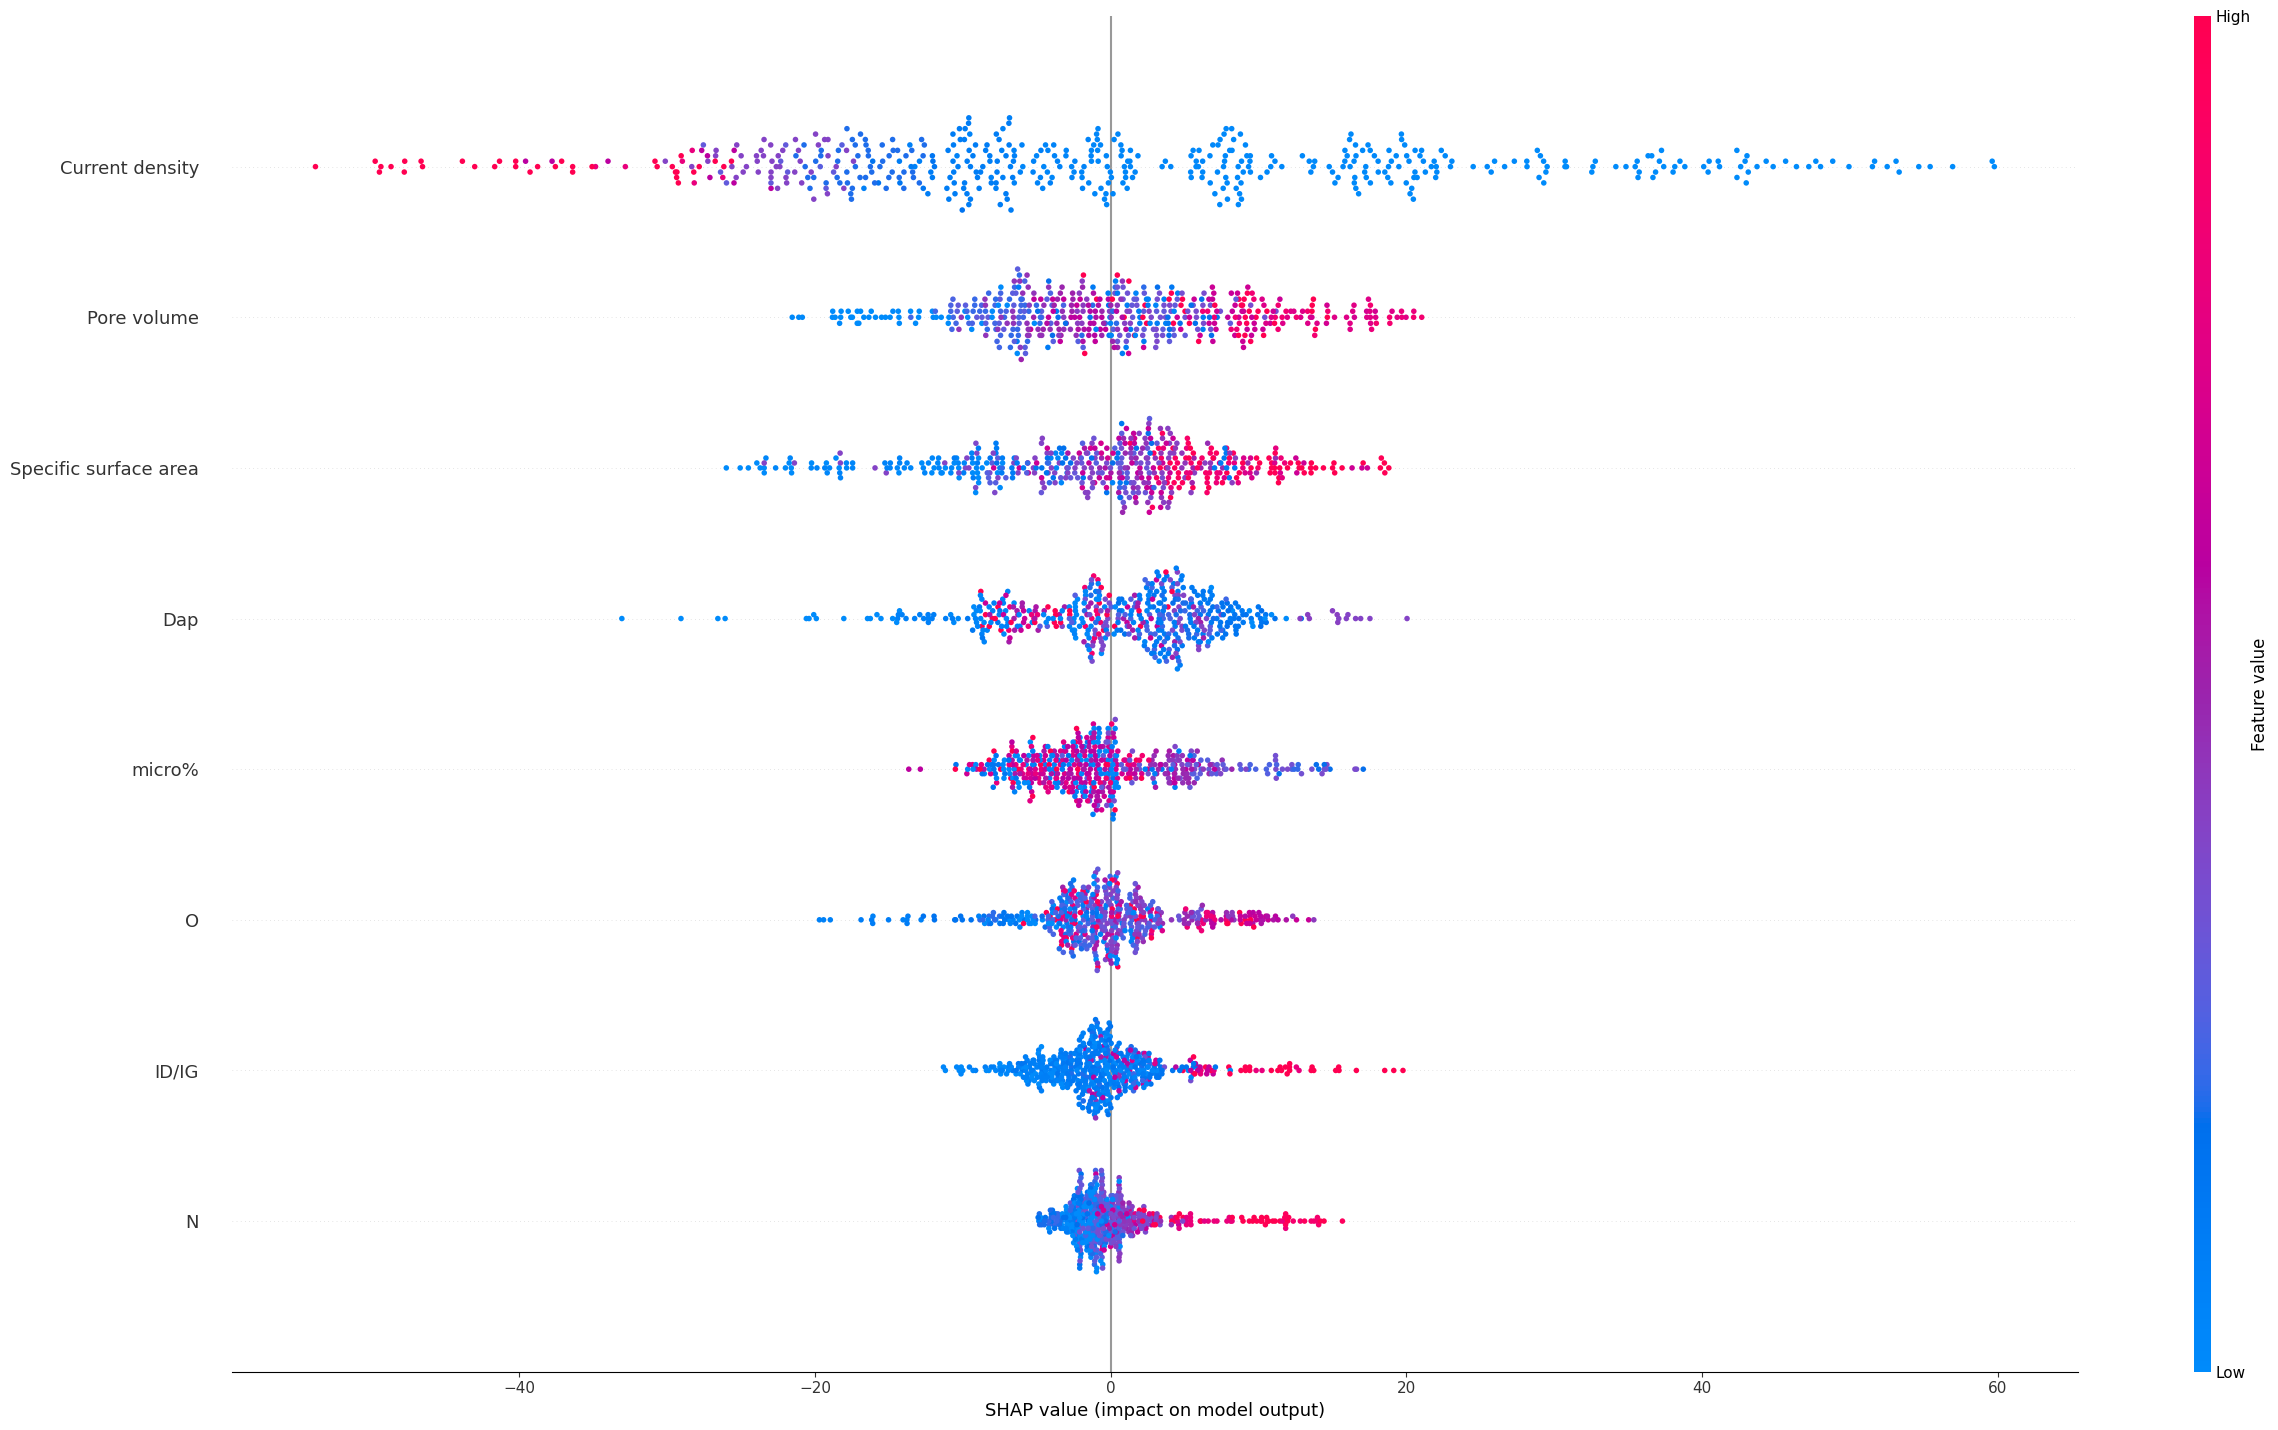

In [2]:
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt

xgb = XGBRegressor(n_estimators=80,
                   learning_rate=0.2,
                   subsample=0.5,
                   gamma=0.1,
                   max_depth=8,
                   min_child_weight=2,
                   reg_alpha=0.26,
                   colsample_bytree=0.7,
                   colsample_bylevel=1.0,
                   colsample_bynode=0.5,
                   random_state=21)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

explainer = shap.Explainer(xgb)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar", plot_size=(25.6, 14.4), show=False)
plt.savefig('output/figures/shap_trainset_reduced_summary_bar.png')

# 清除当前图形
plt.clf()

shap.summary_plot(shap_values, X_train, plot_size=(25.6, 14.4), show=False)
plt.savefig('output/figures/shap_trainset_reduced_summary.png')

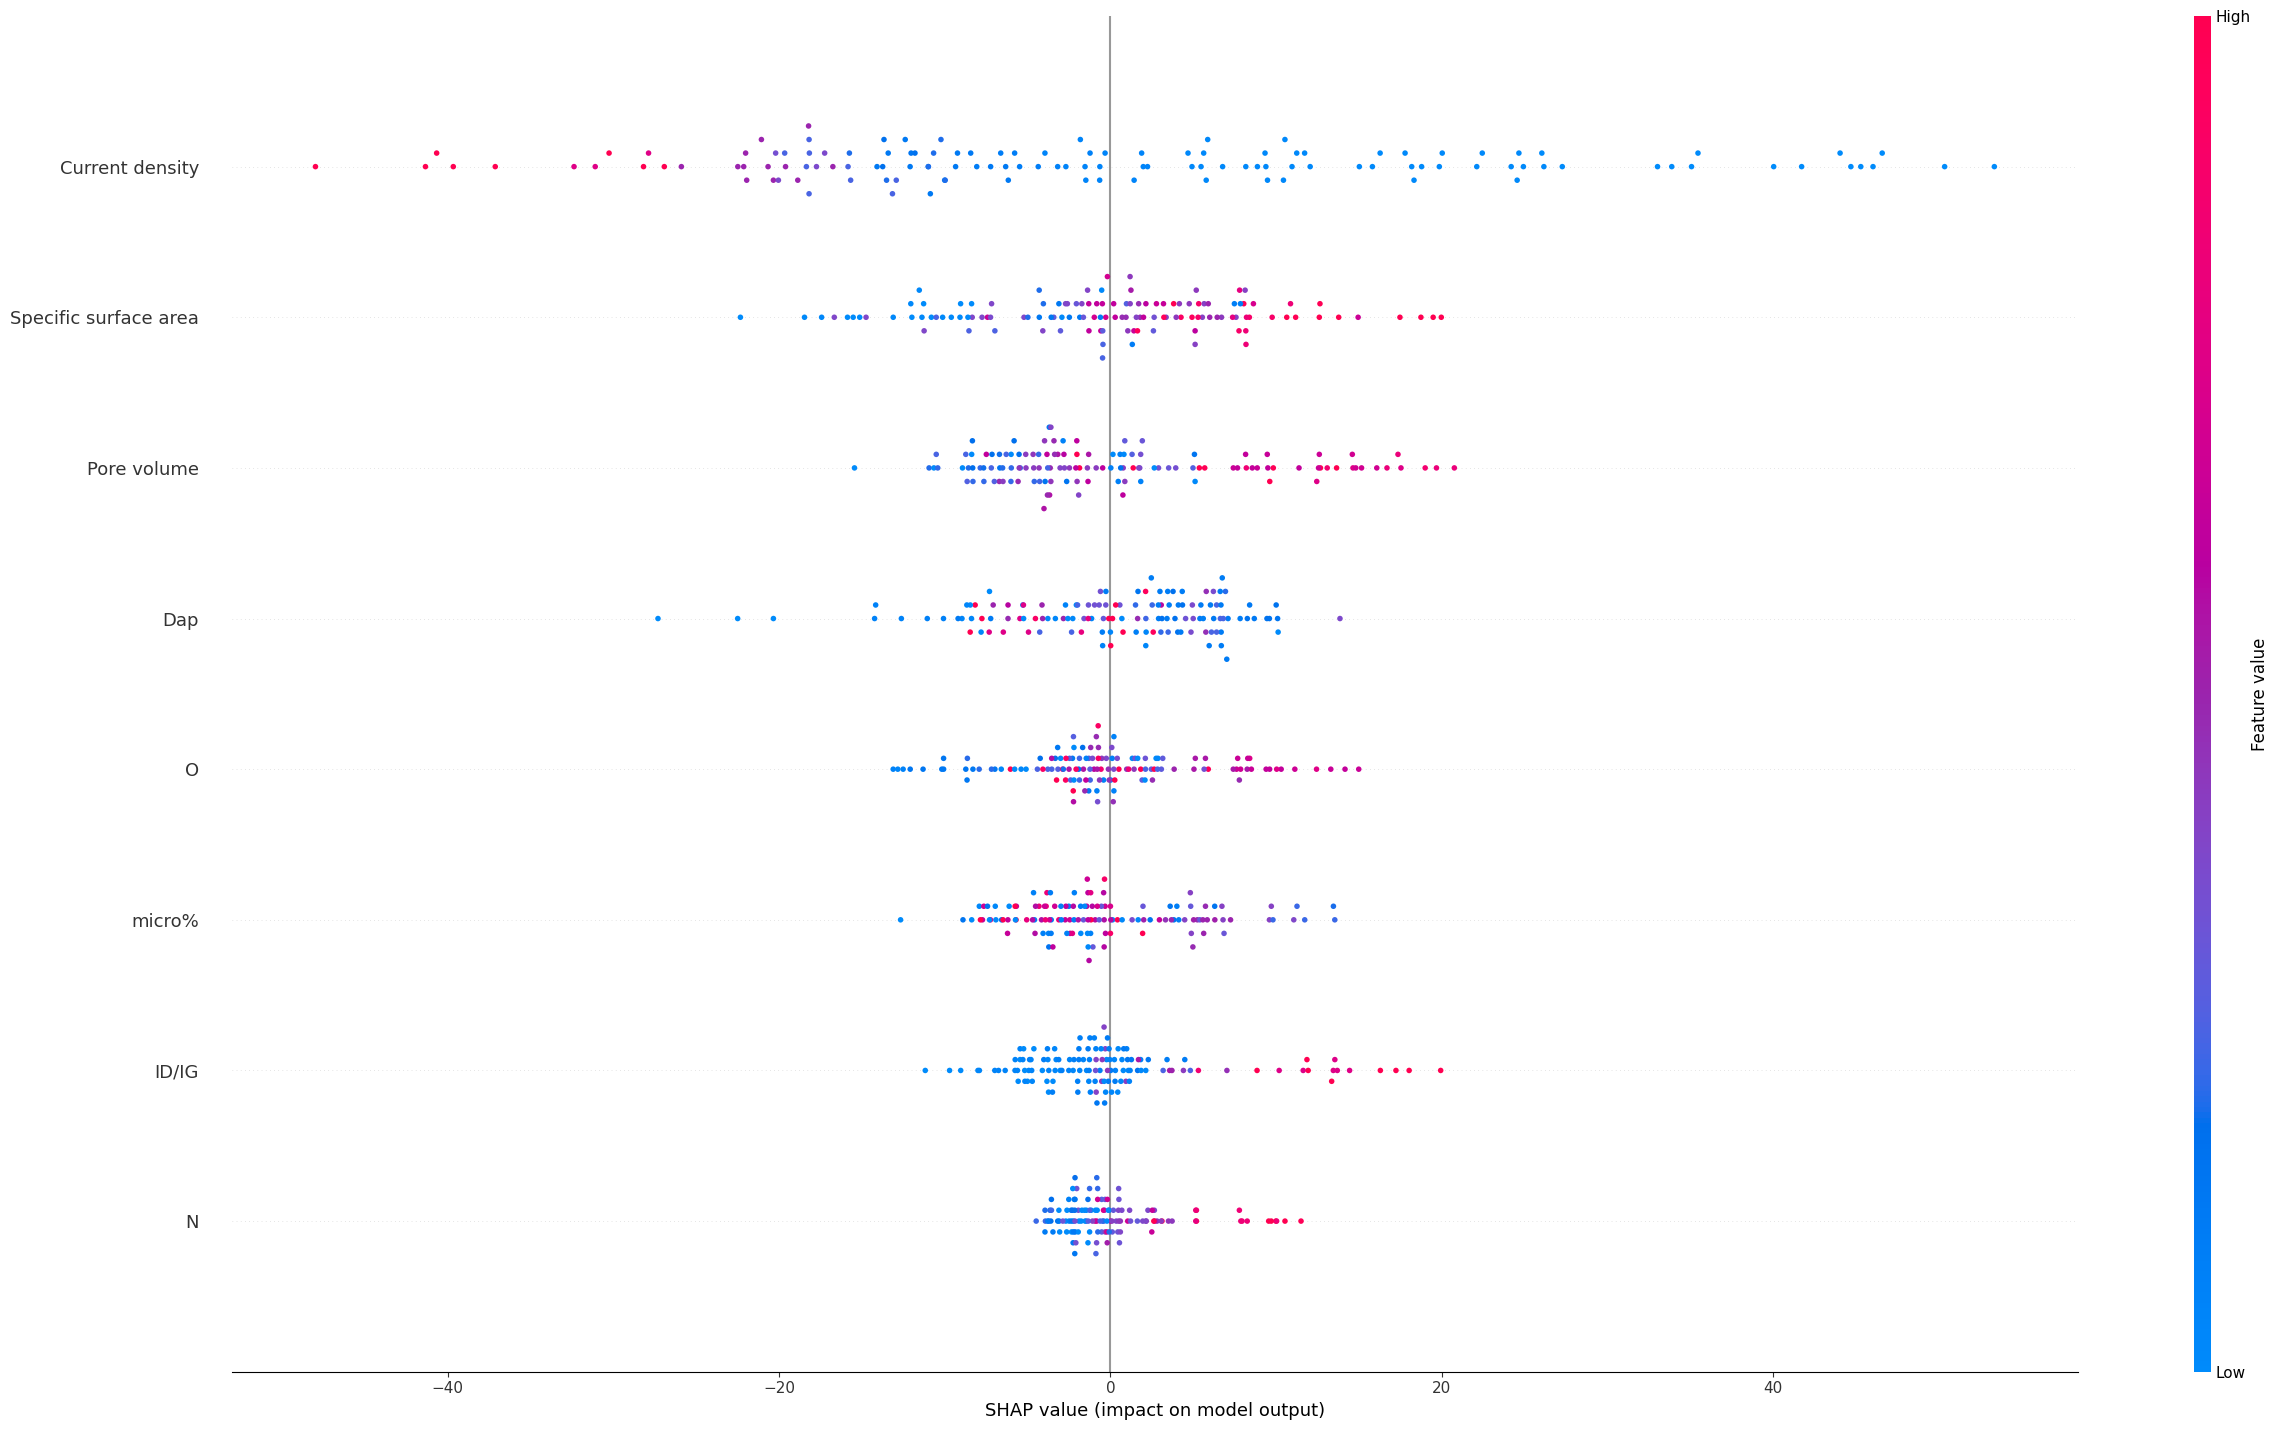

In [3]:
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(25.6, 14.4), show=False)
plt.savefig('output/figures/shap_testset_reduced_summary_bar.png')

# 清除当前图形
plt.clf()

shap.summary_plot(shap_values, X_test, plot_size=(25.6, 14.4), show=False)
plt.savefig('output/figures/shap_testset_reduced_summary.png')